In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)
trial = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
mousetrial = pd.merge(mouse,trial, on="Mouse ID", how='outer')

# Display the data table for preview
mousetrial.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor = mousetrial.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumorresp = pd.DataFrame(tumor)
tumorindex= tumorresp.reset_index()
# Preview DataFrame
tumorindex.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stderrtumor = mousetrial.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
stderrtumorresp = pd.DataFrame(stderrtumor)
stderrindex = stderrtumorresp.reset_index()

# Preview DataFrame
stderr = stderrtumorresp.unstack(level = 0)
stderr['Tumor Volume (mm3)']

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [4]:
# Minor Data Munging to Re-Format the Data Frames
drugresp = tumorresp.unstack(level=0)
drugresp['Tumor Volume (mm3)']

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
# Generate the Plot (with Error Bars)

##Generate the specific table to pull the data from
Drugs=["Capomulin", "Infubinol", "Ketapril","Placebo"]
Drugresponse = []
for x in range(len(Drugs)):
    Drugresponse.append(drugresp["Tumor Volume (mm3)"][Drugs[x]])
Drugresponse
Drugresp = pd.DataFrame(Drugresponse)
Drugrespo = Drugresp.transpose()
Drugrespo

,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [6]:
##Generate the specific table to pull the data from (error)
Drugrerror = []
for x in range(len(Drugs)):
    Drugrerror.append(stderr["Tumor Volume (mm3)"][Drugs[x]])
Drugrerror
Drugrerr = pd.DataFrame(Drugrerror)
Drugrerr = Drugrerr.transpose()
Drugrerr

,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


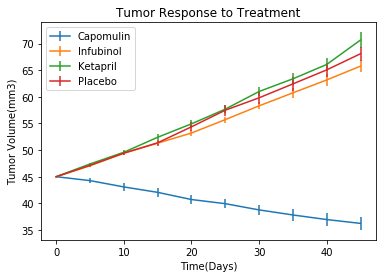

In [54]:
# Get x axis and individual drugs assigned for the plot of only 4 conditions

x_axis=Drugrespo.index
Drugs=["Capomulin", "Infubinol", "Ketapril","Placebo"]
# Plot including the error for the 4 conditions in question
for drug in Drugs:
    plt.errorbar(x_axis,Drugrespo[drug],yerr = Drugrerr[drug], label = drug)
    
plt.legend(loc='upper left')
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume(mm3)")
plt.savefig('Tumor Response to Treatment.png')
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta = mousetrial.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
metatreat = pd.DataFrame(meta)
# Preview DataFrame
metatreat.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metasem = mousetrial.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
metatreatse = pd.DataFrame(metasem)
# Preview DataFrame
metatreatse.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
metatreatment = metatreat.unstack(level=0)
metatreatment["Metastatic Sites"].head()
# Preview that Reformatting worked on data


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
# More Data Munging to Re-Format the Data Frames
metatreatmentse = metatreatse.unstack(level=0)
metatreatmentse["Metastatic Sites"].head()
# Preview that Reformatting worked on data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [12]:
##Generate the specific table to pull the data from

Metatreat = []
for x in range(len(Drugs)):
    Metatreat.append(metatreatment["Metastatic Sites"][Drugs[x]])
Metastatreat = pd.DataFrame(Metatreat)
Metastrat = Metastatreat.transpose()
Metastrat

,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [13]:
## Generate the specific table for standard error

Metatreatse = []
for x in range(len(Drugs)):
    Metatreatse.append(metatreatmentse["Metastatic Sites"][Drugs[x]])
Metaerr = pd.DataFrame(Metatreatse)
Metaerr = Metaerr.transpose()
Metaerr

,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


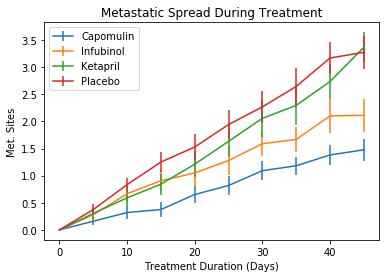

In [53]:
# Generate the Plot (with Error Bars)


xaxis=Metastrat.index

# Plot including the error for the 4 conditions in question
for drug in Drugs:
    plt.errorbar(xaxis,Metastrat[drug],yerr = Metaerr[drug], label = drug)


plt.legend(loc='upper left')
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
# Save the Figure
plt.savefig('Metastatic Spread During Treatment.png')
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survive = mousetrial.groupby(["Drug","Timepoint"])["Mouse ID"].nunique()
# Convert to DataFrame
survival = pd.DataFrame(survive)
survivor= survival.reset_index()
survivor = survivor.rename(columns={"Mouse ID":"Mouse Count"})
# Preview DataFrame
survivor.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
# Minor Data Munging to Re-Format the Data Frames
survivaltime = survival.unstack(level=0)
survivaltime["Mouse ID"].head()
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


In [17]:
Survivalt = []
for x in range(len(Drugs)):
    Survivalt.append(survivaltime["Mouse ID"][Drugs[x]])
Survivaldf = pd.DataFrame(Survivalt)
Survivaltp = Survivaldf.transpose()
Survivaltp = (Survivaltp)/25

Survivaltp

,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,1.00,1.00,1.00,1.00
5,1.00,1.00,0.92,0.96
10,1.00,0.84,0.88,0.96
15,0.96,0.84,0.76,0.80
20,0.92,0.80,0.76,0.76
25,0.88,0.72,0.76,0.68
30,0.88,0.68,0.72,0.60
35,0.88,0.48,0.68,0.56
40,0.84,0.40,0.60,0.48


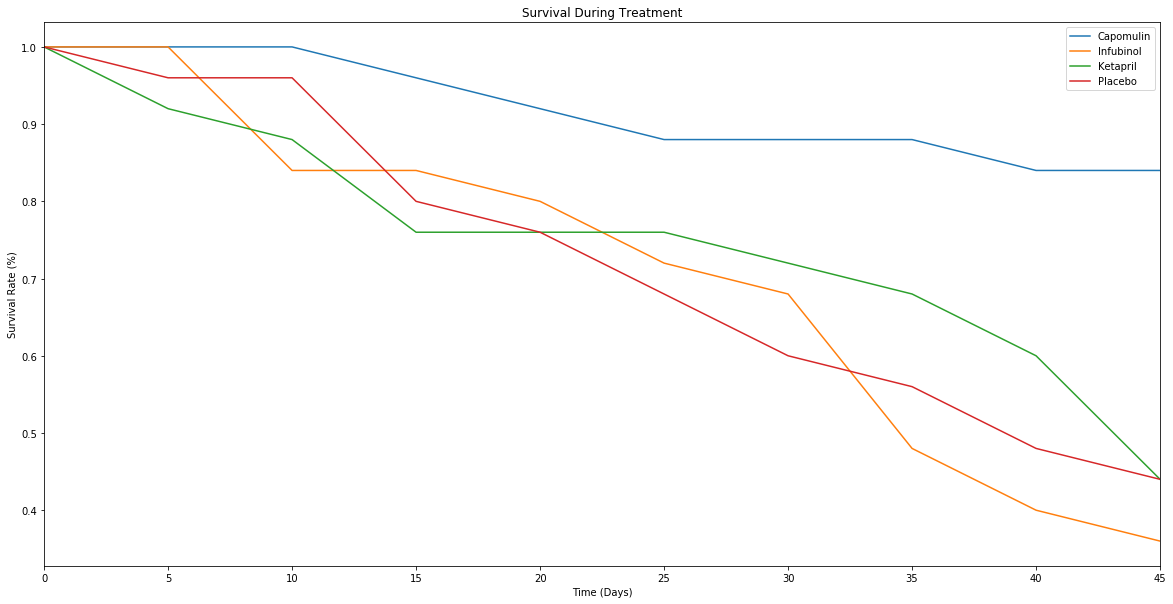

In [52]:
# Generate the Plot (Accounting for percentages)

Survivaltp.plot(figsize=(20,10))
plt.legend(loc='bottom left')
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
# Save the Figure
plt.savefig('Survival During Treatment.png')
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug
PercentChange = []
Changes = drugresp['Tumor Volume (mm3)']
Lastrow = len(Changes)-1

# Display the data to confirm
PercentChange = (Changes.iloc[Lastrow]-Changes.iloc[0])/Changes.iloc[0]*100 
PercentChange


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

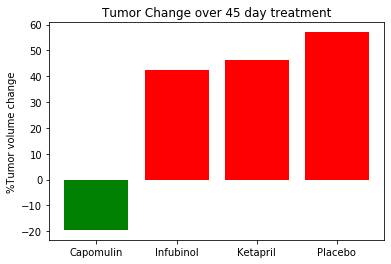

In [55]:
# Store all Relevant Percent Changes into a Tuple
Perchange = []
for x in range(len(Drugs)):
     Perchange.append(PercentChange[x])
y_axis = tuple(Perchange)

color = []
# Splice the data between passing and failing drugs
for x in range(len(Drugs)):
    if y_axis[x] < 0:
        color.append('green')
    else:
        color.append('red')

# Orient widths. Add labels, tick marks, etc. 
plt.bar(Drugs, y_axis, width=0.8, bottom=None, align='center', color = color)
plt.xticks(Drugs)
plt.ylabel('%Tumor volume change')
plt.title('Tumor Change over 45 day treatment')

# Save the Figure
plt.savefig('Tumor Change over 45 Days.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)

In [ ]:
##Observations from the data
##1. Capomulin overall performed better  
##where the %Volume change improved, and the survival rate was higher than any of the other test conditions it also had the
## the lowest number of metastatic spread

##2. Infubinol performed better than Placebo compared to % Tumor volume change, however the survival rate was very low - 
##since survival is more important that tumor size, Infubinol would therefore be considered to be more harmful than doing nothing (Placebo effect)

##3.Ketapril had a worse metastatic spread rate than a placebo, although it looked positive in the beginning days of the testing
##by the end of the study it had become worse, the tumors themselves did not grow as much as the placebo ones did, however
##the spread was worse. survival rate was also equal to placebo, therefore Ketapril has a similar reactivity as a placebo - doing nothing

